<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/8_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

교재 10장의 주택 데이터셋 선형 회귀를 해봅시다

교재의 코드 및 데이터 링크 (블랙보드 강의자료에도 링크 올렸습니다. )

https://github.com/rickiepark/python-machine-learning-book-3rd-edition

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt')

In [ ]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
df.columns

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt', sep='\s+', header=None ) # \s+는 space 나 tab 이 섞여있을 때

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

# 1. CRIM      per capita crime rate by town
# 2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
# 3. INDUS     proportion of non-retail business acres per town
# 4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
# 5. NOX       nitric oxides concentration (parts per 10 million)
# 6. RM        average number of rooms per dwelling
# 7. AGE       proportion of owner-occupied units built prior to 1940
# 8. DIS       weighted distances to five Boston employment centres
# 9. RAD       index of accessibility to radial highways
# 10. TAX      full-value property-tax rate per $10,000
# 11. PTRATIO  pupil-teacher ratio by town
# 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
# 13. LSTAT    % lower status of the population
# 14. MEDV     Median value of owner-occupied homes in $1000s

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


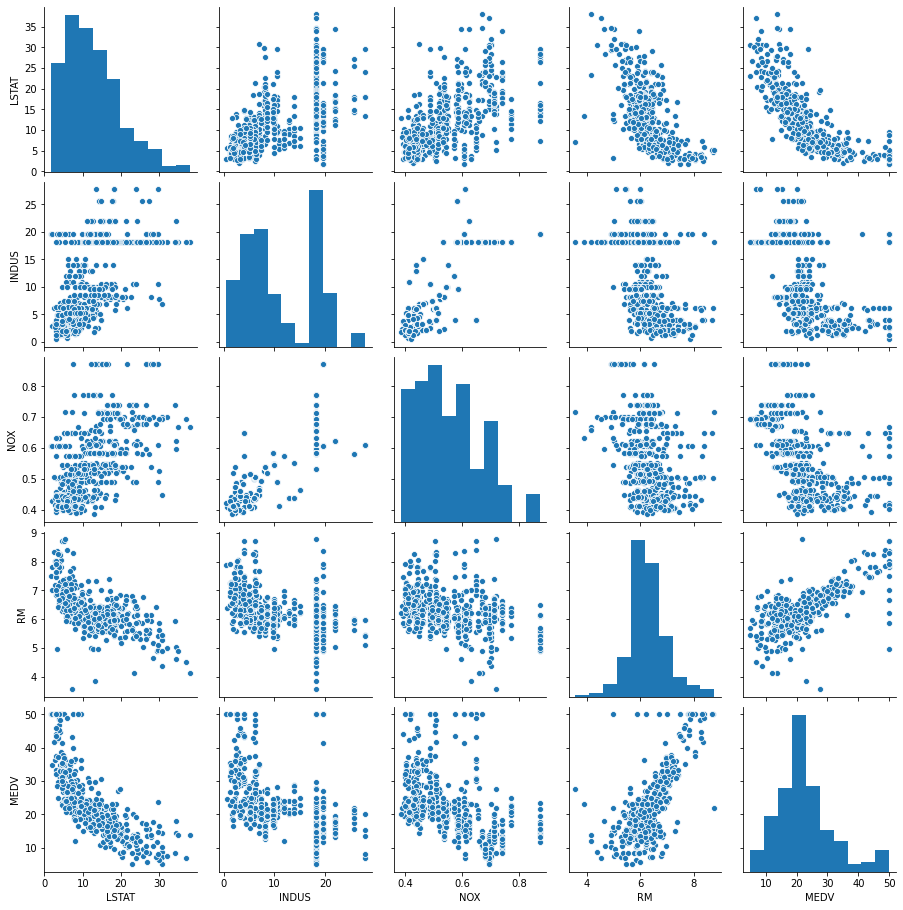

In [ ]:
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height = 2.5)


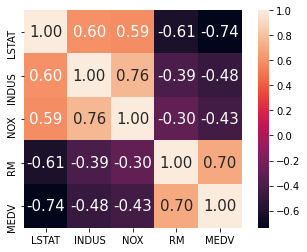

In [ ]:
# heatmap 그리기
# 상관관계 행렬 그리기

import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
#hm = sns.heatmap(cm,yticklabels=cols, xticklabels=cols )
plt.show()


In [ ]:
cm

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

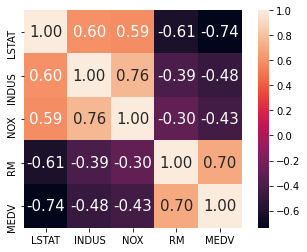

In [ ]:
# 이미지 저장할 때는
import matplotlib.pyplot as plt
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.savefig('10_04.png', dpi=300)

In [ ]:
!ls

10_04.png  sample_data


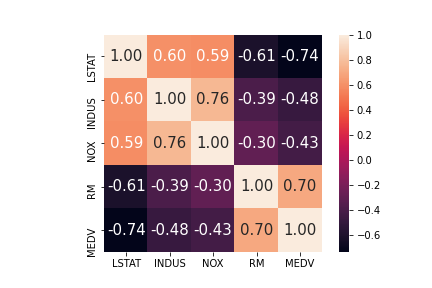

In [ ]:
# 저장한 이미지 불러오기
from IPython.display import Image
Image(filename='10_04.png', width=500)

# Matplotlib

파이썬에서 가장 기본적인 그래프 라이브러리임

https://matplotlib.org/index.html

seaborn 또는 pandas에서 df.plot.bar() 등을 사용할 때도 실제로는 matplotlib 라이브러리를 활용한 차트를 그리는 것임

plt.show()를 하기 전에 여러개를 그리면 한 차트에 겹쳐서 그려지게 됨
따라서 한 셀씩 실행할 때가 아니라면 plt.show() 를 사용하는 것이 좋음

# scikit learn
LinearRegression 함수를 사용하여 회귀 모델을 손쉽게 만들 수 있다

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [ ]:
# 방개수(RM 컬럼)와 가격(MEDV)의 관계를 구해보자

X = df[['RM']].values   # values를 사용하면 데이터프레임의 데이터만 가져온다 (인덱스명과 컬럼명 제외, 판다스 데이터 프레임은 데이터를 numpy array로 반환)
y = df.MEDV.values

In [ ]:
print(X.shape)
print(y.shape)


(506, 1)
(506,)


In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
slr.coef_

array([9.10210898])

In [ ]:
slr.intercept_

-34.67062077643857

In [ ]:
slr.score(X,y) #  R^2 

0.4835254559913343

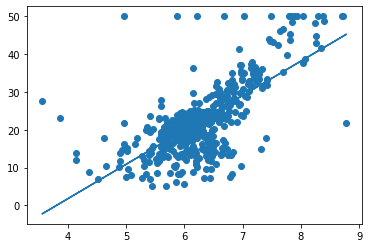

In [ ]:
plt.scatter(X,y)
plt.plot(X, slr.predict(X))

In [ ]:
slr.predict(X[:3])

array([25.17574577, 23.77402099, 30.72803225])

In [ ]:
X[:3]

array([[6.575],
       [6.421],
       [7.185]])

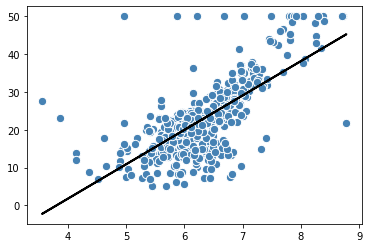

In [ ]:
plt.scatter(X,y, color = 'steelblue', edgecolors='white',s=70)
plt.plot(X, slr.predict(X), color='black', lw=2)

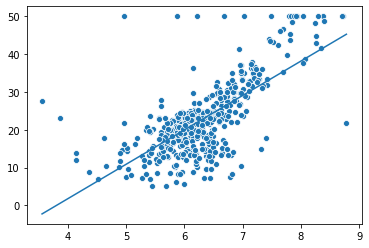

In [ ]:
sns.scatterplot(x=df.RM.values, y=df.MEDV.values)
sns.lineplot(df.RM.values,slr.predict(X) )